In [23]:
import sys
sys.path.insert(1, '../src/magpies/')
from magpies import *
from atmos import *
import numpy as np
from math import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
## Radius and mass of neutron star
Rns = 12  ## km
Mns = 1.4 ## M_solar
Tb = pow(10, 7.1730)  ## K
Bp = 1e14 ## G

## Instrument and exposure
eph = np.linspace (0.20, 3.00, 32) ## Nicer soft X-ray range
nphot = 5e5

g14c = g14 (Rns, Mns) ## computing the free fall acceleration
 
print ('g14 = ', g14c, ' xg = ', xg(Rns, Mns), 1.0 / (1 - xg(Rns, Mns)))

g14 =  1.6054273795798544  xg =  0.3465367097448258 1.530307845769737


In [25]:
## Initialising the atmosphere
atm_iron_2003 = NS_atmosphere ('Potekhin_2003_iron', g14c, Tb, Bp)
atm_iron_2003.describe ()

Surface temperatures for magnetised envelope of NS
Following fit from Potekhin, Yakovlev, Chabrier & Gnedin (2003) for iron envelope
The Astrophysical Journal, Volume 594, Issue 1, pp. 404-418  2003ApJ...594..404P
Same fits are provided in Beznogov, Potekhin & Yakovlev (2021) for iron envelope
Physics Reports, Volume 919, p. 1-68 2021PhR...919....1B


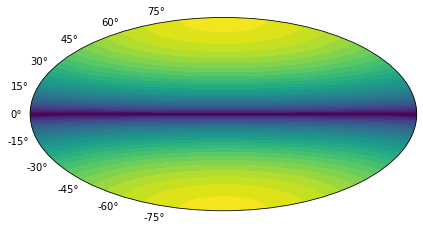

In [26]:
theta = np.linspace (0, pi, 100)  ## theta coordinates
phi   = np.linspace (0, 2*pi, 99) ## phi coordinates

theta1, phi1 = np.meshgrid (theta, phi)

Ts = atm_iron_2003.Ts (theta1) ## Surface temperatures

#for i in range (0, Ts.shape[0]):
#    for j in range (0, Ts.shape[1]):
#        Ts[i,j] = 1e6

frame = plt.subplot(111, projection='aitoff')
bc = plt.contourf (phi-pi, -(theta-pi/2), Ts.T, 40)
frame.axes.xaxis.set_ticklabels([])
plt.tight_layout()
plt.savefig ('surface_temperature_72_14.png')

In [27]:
## Here we produce and store the soft X-ray spectra for two orientations: pole on and equatorial 
sp_red_n, map_of_visible = get_redshifted_spectra_pole_photons (theta, phi, Ts, Rns, Mns, eph, nphot)
sp_red_n_eq, map_of_visible = get_redshifted_spectra_equator_photons (theta, phi, Ts, Rns, Mns, eph, nphot)

In [28]:
L =  compute_L (theta, phi, Rns, Ts)
Teff = compute_Teff (theta, phi, Rns, Ts)

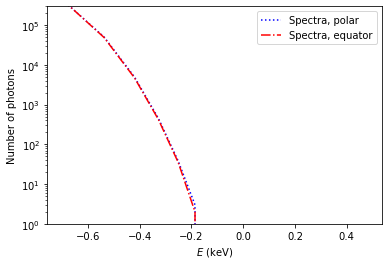

In [29]:
plt.plot (np.log10(eph), sp_red_n, 'b:', label='Spectra, polar')
plt.plot (np.log10(eph), sp_red_n_eq, 'r-.', label='Spectra, equator')
plt.xlabel(r'$E$ (keV)')
plt.ylabel('Number of photons')
plt.yscale('log')
plt.ylim([1, 3e5])
plt.legend()

[0.3370285101465055, 0.15995530488581505, 1.2498058318460306, 1.0266936508254463, 23.241960942285047, 0.32666229690718707]


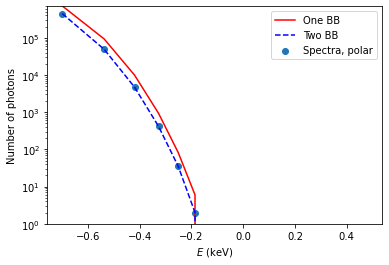

In [30]:
bb2_opt_par = fit_spectral_model_Cstat (Teff, Rns, Mns, sp_red_n_eq, eph, nphot, L)
print (bb2_opt_par)


bb2_opt = examine_spectral_fit_2BB_photons (bb2_opt_par[0:4], Teff, Rns, Mns, eph, nphot, L)


bb1_opt = examine_spectral_fit_1BB_photons ([bb2_opt_par[0]*2, bb2_opt_par[2]], Teff, Rns, Mns, eph, nphot, L)




plt.scatter (np.log10(eph), sp_red_n_eq, label='Spectra, polar')
plt.plot (np.log10(eph), bb1_opt, 'r-', label='One BB')
plt.plot (np.log10(eph), bb2_opt, 'b--', label='Two BB')
plt.xlabel(r'$E$ (keV)')
plt.ylabel('Number of photons')
plt.yscale('log')
plt.ylim([1, 7e5])
plt.legend()
plt.savefig('fit_2BB_eq.png')